# ***--------------------------- Retail Analysis with foodmart Data --------------------------***

### **Description**

One of the leading retail stores in the US, Foodmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Foodmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Foodmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Foodmart stores located in different regions are available.

----------------------------------------------------------------------------------------------------------------------------------------

### **Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Foodmart_Store_sales. Within this file you will find the following fields:

**Store -** the store number

**Date -** the week of sales

**Weekly_Sales -**  sales for the given store

**Holiday_Flag -** whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature -** Temperature on the day of sale

**Fuel_Price -** Cost of fuel in the region

**CPI –** Prevailing consumer price index

**Unemployment -** Prevailing unemployment rate

----------------------------------------------------------------------------------------------------------------------------------------

### **Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

----------------------------------------------------------------------------------------------------------------------------------------

### **Analysis Tasks**

* Which store has maximum sales

* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

* Which store/s has good quarterly growth rate in Q3’2012

* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

* Provide a monthly and semester view of sales in units and give insights

----------------------------------------------------------------------------------------------------------------------------------------

### **Statistical Model**

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks/Advance project/Retail_analysis/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Advance project/Retail_analysis


In [3]:
# Import Dataset

df = pd.read_csv('Foodmart_Store_sales.csv')
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
# Changing the date datatype to datetime64

from datetime import datetime
df['Date'] = pd.to_datetime(df['Date']);

In [6]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

------------------------------------------

# **(1) Which store has maximum sales?**

In [11]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [12]:
# Maximum Sales

pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


In [13]:
# Minimum Sales

pd.DataFrame(total_sales).tail(1)

,Weekly_Sales
Store,
33,37160222.0


#### Store - 20 has a maximum sales = $301,397,792 

#### Store - 33 has a minimum sales = $37,160,222

------------------------------------------

## **(2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out**
## **the coefficient of mean to standard deviation**

In [14]:
df_std = df.groupby('Store')['Weekly_Sales'].std().round(3).sort_values(ascending=False)

In [15]:
pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996


#### Store - 14 has a maximum standard deviation = $317,569.949

In [16]:
store14 = df[df.Store == 14].Weekly_Sales

In [17]:
mean_to_stddev = store14.std()/store14.mean()*100

mean_to_stddev.round(2)

15.71

#### Mean to Standard Deviation = 15.71%

------------------------------------------

## **(3) Which store/s has good quarterly growth rate in Q3’2012 ?**

In [18]:
q2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [19]:
pd.DataFrame({'Q2 Sales':q2_sales,
              'Q3 Sales':q3_sales,
              'Difference':(q3_sales-q2_sales),
              'Growth Rate':(q3_sales-q2_sales)/q3_sales*100}).sort_values(by=['Growth Rate'], ascending=False).head()

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163
26,13218290.0,12417575.0,-800715.0,-6.448240
39,20191586.0,18899955.0,-1291631.0,-6.834043


#### No store has shown quarterly growth in quarter'3 2012. 

------------------------------------------

## **(4) Some holidays have a negative impact on sales. Find out holidays which have higher**

## **sales than the mean sales in non-holiday season for all stores together.**

In [20]:
# Holiday Events

Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [21]:
# Calculating holiday events sales

Super_Bowl_sales = df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales = df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales = df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [22]:
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [23]:
non_holiday_sales = df[(df['Holiday_Flag'] == 0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [24]:
result = pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
              'Labour Day Sales':Labour_Day_sales,
              'Thanksgiving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holiday_sales}]).T

result

,0
Super Bowl Sales,1079127.99
Labour Day Sales,1042427.29
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
Non Holiday Sales,1041256.38


#### Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38).

------------------------------------------

## **(5) Provide a monthly and semester view of sales in units and give insights.**

In [25]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


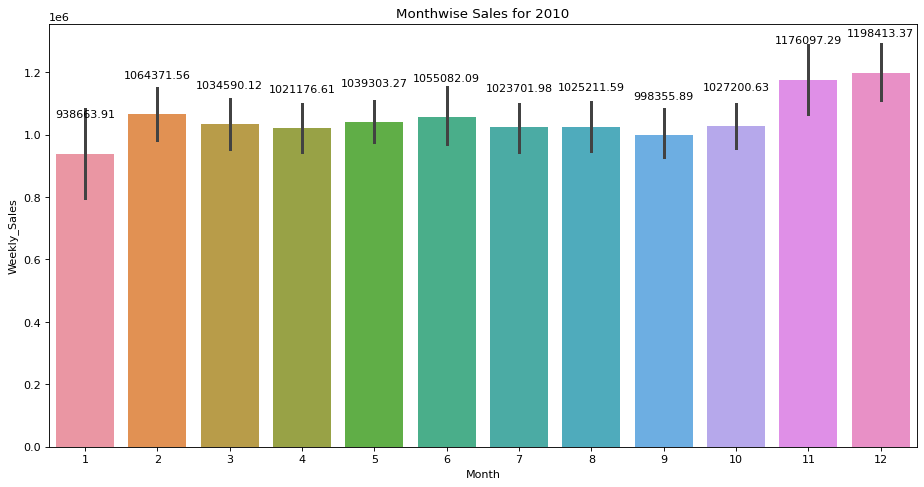

In [27]:
# Sales for the Year - 2010

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2010]['Month'], y=df[df.Year==2010]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2010')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

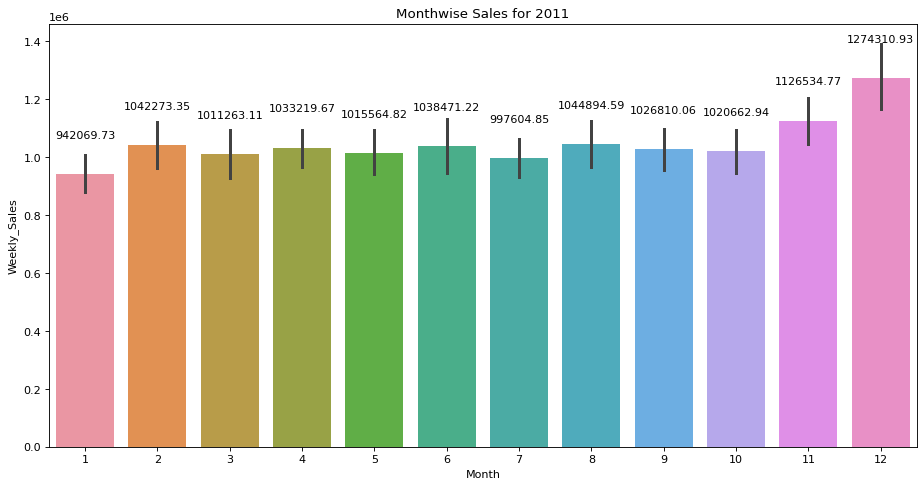

In [28]:
# Sales for the Year - 2011

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2011]['Month'], y=df[df.Year==2011]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2011')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

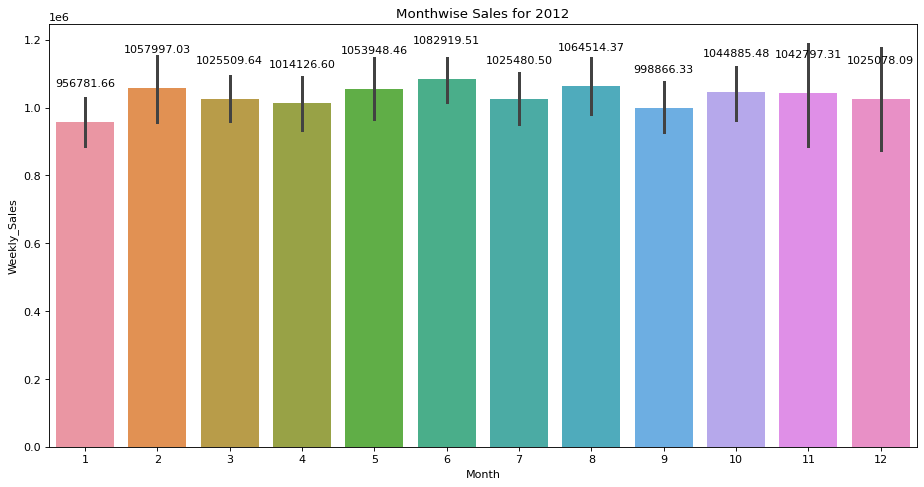

In [29]:
# Sales for the Year - 2012

plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.Year==2012]['Month'], y=df[df.Year==2012]['Weekly_Sales'])
graph1.set(title='Monthwise Sales for 2012')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

Text(0.5, 1.0, 'Monthwise Sales')

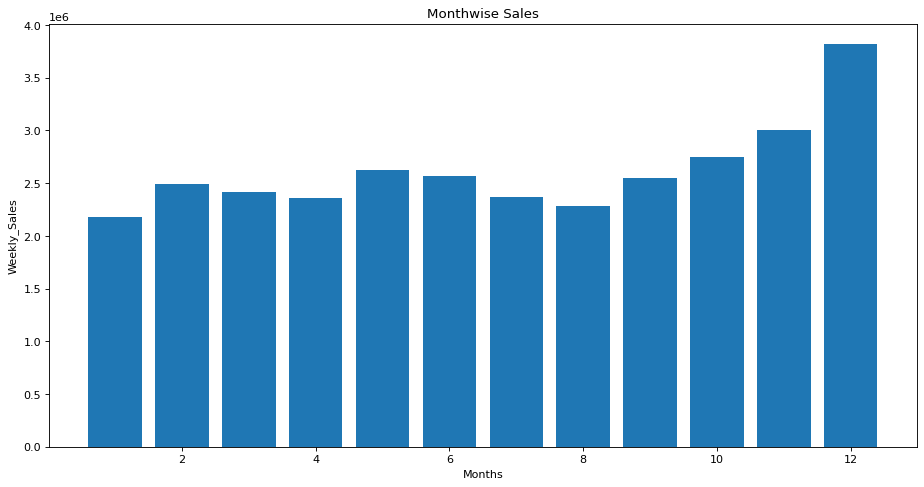

In [30]:
# Monthwise Sales

plt.figure(figsize=(14,7), dpi=80)
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

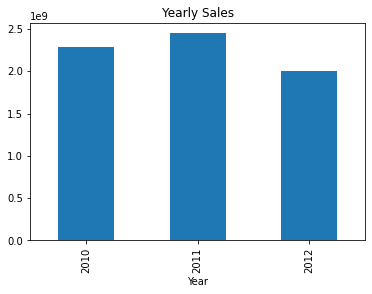

In [31]:
# Yearly Sales

plt.figure(figsize=(10,7), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

#### (1) Year 2010 has the highest sales and 2012 has the lowest sales.

#### (2) December month has the highest weekly sales.

#### (3) Year 2011 has the highest weekly sales.

------------------------------------------

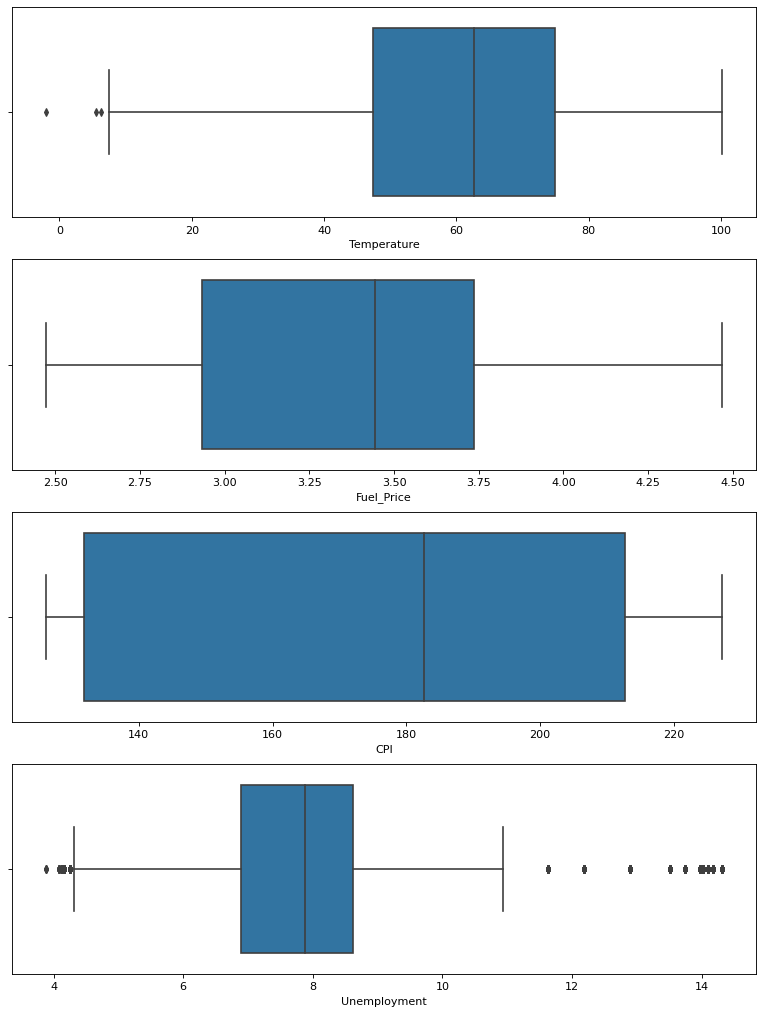

In [32]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = df[df['Unemployment'] <= 10.5]
df = df[df['Unemployment'] >= 4.7]
df = df[df['Temperature'] >= 8]

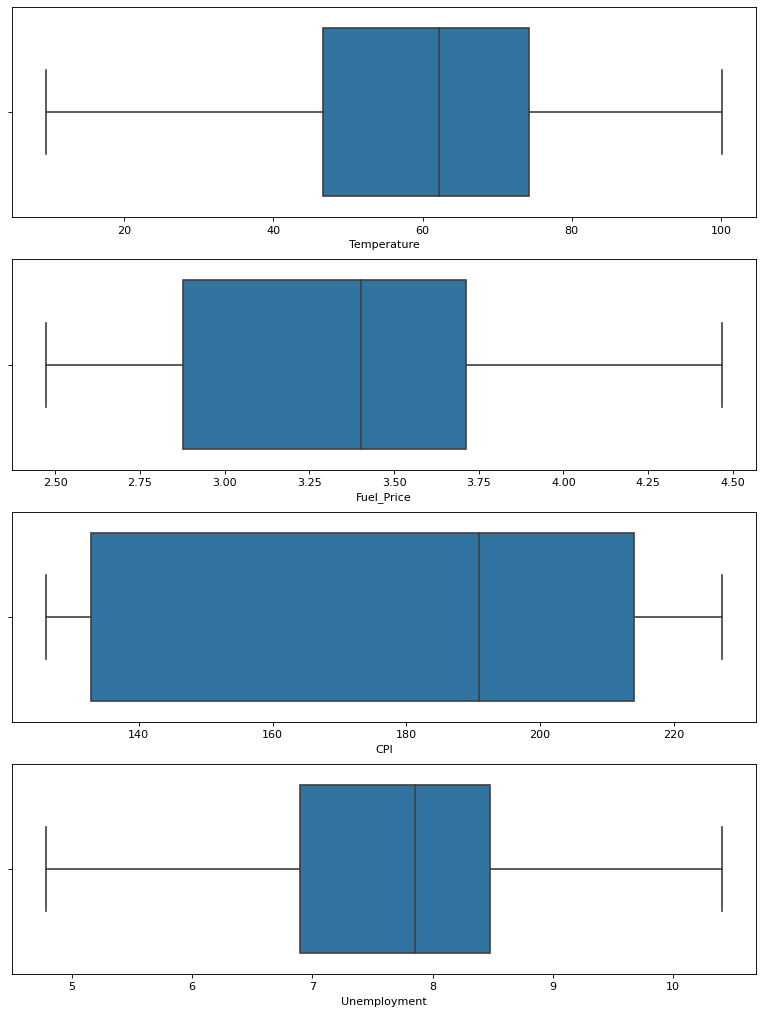

In [34]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5763 non-null   int64         
 1   Date          5763 non-null   datetime64[ns]
 2   Weekly_Sales  5763 non-null   float64       
 3   Holiday_Flag  5763 non-null   int64         
 4   Temperature   5763 non-null   float64       
 5   Fuel_Price    5763 non-null   float64       
 6   CPI           5763 non-null   float64       
 7   Unemployment  5763 non-null   float64       
 8   Day           5763 non-null   int64         
 9   Month         5763 non-null   int64         
 10  Year          5763 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 540.3 KB


------------------------------------------

# **Model Building**

In [36]:
# Define Independent and dependent variable

x = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = df['Weekly_Sales']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## **(1) Linear Regression**

* Linear Regression *

Train Accuracy Score: 12.61 %
Test Accuracy Score: 13.13 %
Mean Absolute Error: 445841.813
Mean Squared Error: 293814166365.609
Root Mean Squared Error: 542046.277


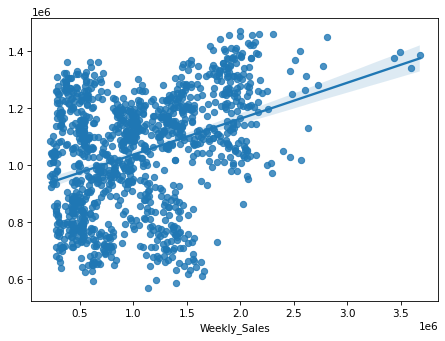

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print('* Linear Regression *\n')

print('Train Accuracy Score:', lr.score(x_train, y_train).round(5)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(3))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, lr_y_pred)

## **(2) Random Forest Regressor**

* Random Forest Regressor *

Accuracy                 = 76.291 %
Mean Absolute Error      = 119878.42798
Mean Squared Error       = 80189443990.95596
Root Mean Squared Error  = 283177.40727


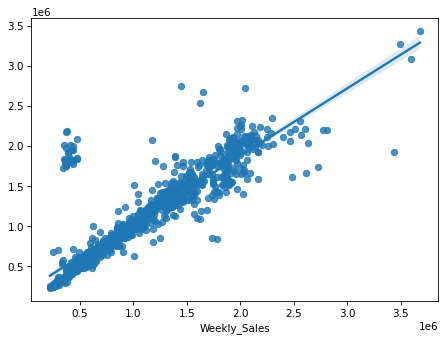

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, rfr_y_pred)

## **(3) Decision Tree Regressor**

* Decision Tree Regressor *

Accuracy                 = 72.88 %
Mean Absolute Error      = 139436.8843
Mean Squared Error       = 91727254117.91293
Root Mean Squared Error  = 302865.07576


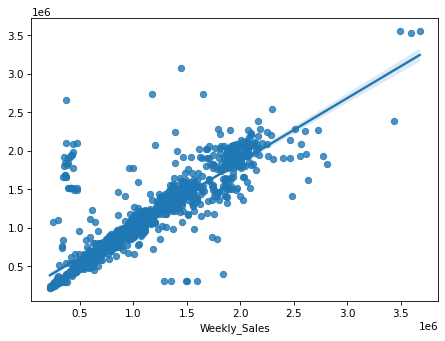

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, dtr_y_pred)

## **(4) KNearest Neighbors**

* KNearest Neighbors *

Accuracy                 = 41.564 %
Mean Absolute Error      = 335928.99299
Mean Squared Error       = 197644404169.9196
Root Mean Squared Error  = 444572.15856


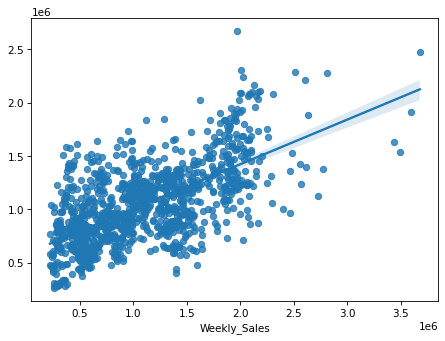

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_y_pred = knn.predict(x_test)

R2_knn = r2_score(y_test, knn_y_pred)
mae = metrics.mean_absolute_error(y_test, knn_y_pred)
mse = metrics.mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

print('* KNearest Neighbors *\n')

print('Accuracy                 =', R2_knn.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, knn_y_pred)

------------------------------------------

# **Cross Validation**

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Linear Regression

lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.08775741 0.12297942 0.15360525 0.08851361 0.10997593 0.1102302
 0.15223531 0.1527964  0.09831055 0.10632273]
Mean Score: 11.827268120525742 %


In [45]:
# Random Forest Regression

rfr_scores = cross_val_score(rfr, x_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.97039733 0.95101526 0.94402647 0.9439039  0.94940154 0.95872041
 0.94213891 0.94792342 0.92438196 0.95664865]
Mean Score: 94.8855784561484 %


In [46]:
# Decision Tree Regression

dtr_scores = cross_val_score(dtr, x_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.94954215 0.91986529 0.90341195 0.92637828 0.93417516 0.91939262
 0.89296053 0.91459464 0.88364128 0.91775016]
Mean Score: 91.61712050384749 %


In [47]:
# KNearest Neighbor

knn_scores = cross_val_score(knn, x_train,y_train, cv=10, scoring='r2')
print(knn_scores)
print("Mean Score:", knn_scores.mean()*100,'%')

[0.37179269 0.40215407 0.39127924 0.3486943  0.43029037 0.36970239
 0.37392608 0.40814289 0.31831835 0.3908518 ]
Mean Score: 38.05152183280452 %


# **Conclusion**

### Here, we have used 4 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an 
### appropriate model to use as accuracy is very low. However, Random Forest Regression gives accuracy of almost 95% . so, it is 
### the best model to forecast weekly sales.